In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [22]:
breast_cancer_data = pd.read_csv("/kaggle/input/breast-cancer-dataset/breast-cancer.csv")
breast_cancer_data.drop("id", axis=1, inplace=True)
breast_cancer_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [23]:
breast_cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [4]:
breast_cancer_data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
breast_cancer_data['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [24]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
breast_cancer_data['diagnosis'] = label_encoder.fit_transform(breast_cancer_data['diagnosis'])

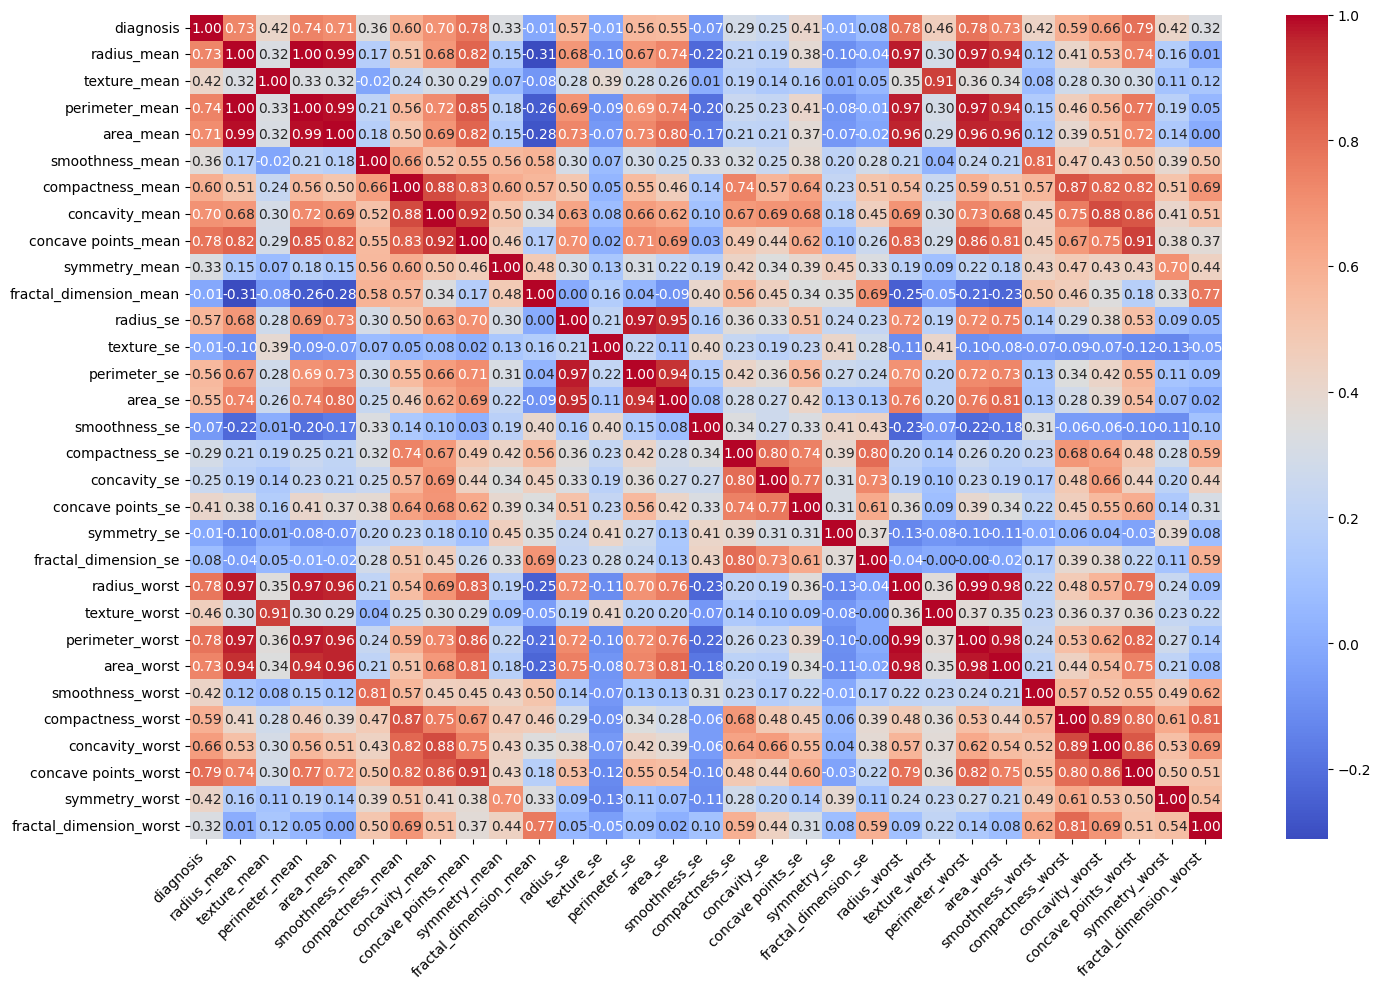

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
corr_matrix = breast_cancer_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# Adjust layout for better visibility
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()


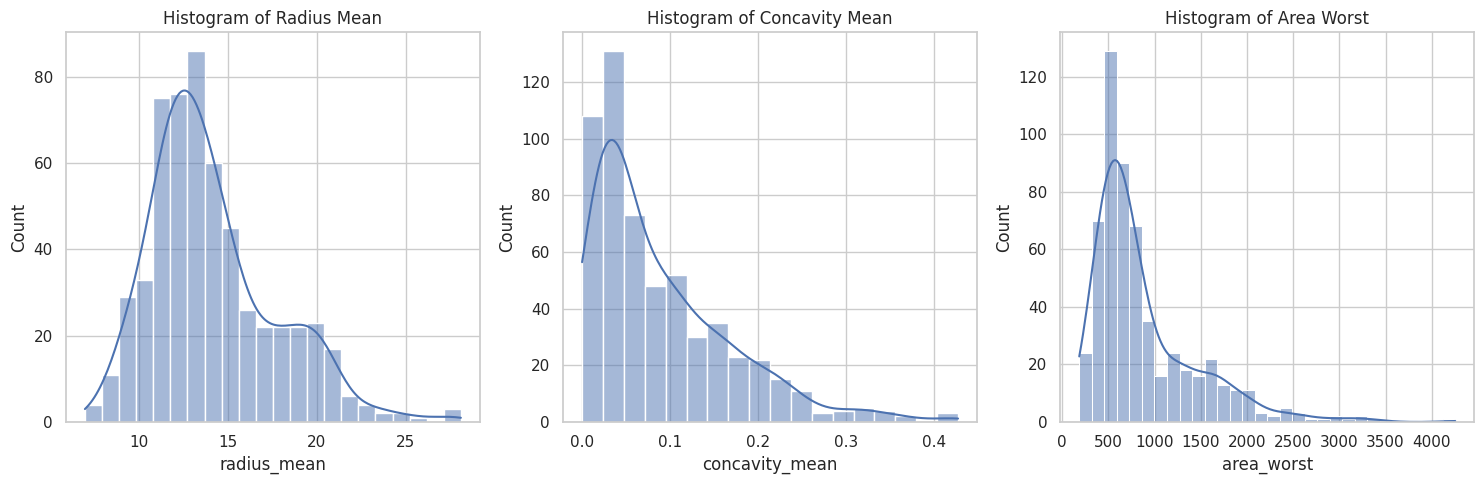

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Plotting histograms for selected columns
plt.figure(figsize=(15, 5))

# Radius Mean
plt.subplot(1, 3, 1)
sns.histplot(breast_cancer_data['radius_mean'], kde=True)
plt.title('Histogram of Radius Mean')

# Concavity Mean
plt.subplot(1, 3, 2)
sns.histplot(breast_cancer_data['concavity_mean'], kde=True)
plt.title('Histogram of Concavity Mean')

# Area Worst
plt.subplot(1, 3, 3)
sns.histplot(breast_cancer_data['area_worst'], kde=True)
plt.title('Histogram of Area Worst')

plt.tight_layout()
plt.show()


# K-Nearest-Neighbor

In [25]:
from sklearn.model_selection import train_test_split
X = breast_cancer_data.drop("diagnosis", axis=1)
y = breast_cancer_data["diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# KNN with k = 1
knn_1 = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knn_1.fit(X_train, y_train)
predictions_1 = knn_1.predict(X_test)

# Print accuracy for k = 1
accuracy_1 = accuracy_score(y_test, predictions_1)
print(f"Accuracy for k = 1: {accuracy_1:.2f}")

# Print classification report for k = 1
print("Classification Report for k = 1:")
print(classification_report(y_test, predictions_1))

# KNN with k = 3
knn_3 = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_3.fit(X_train, y_train)
predictions_3 = knn_3.predict(X_test)

# Print accuracy for k = 3
accuracy_3 = accuracy_score(y_test, predictions_3)
print(f"\nAccuracy for k = 3: {accuracy_3:.2f}")

# Print classification report for k = 3
print("\nClassification Report for k = 3:")
print(classification_report(y_test, predictions_3))


Accuracy for k = 1: 0.93
Classification Report for k = 1:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95        71
           1       0.95      0.86      0.90        43

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114


Accuracy for k = 3: 0.93

Classification Report for k = 3:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94        71
           1       0.93      0.88      0.90        43

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



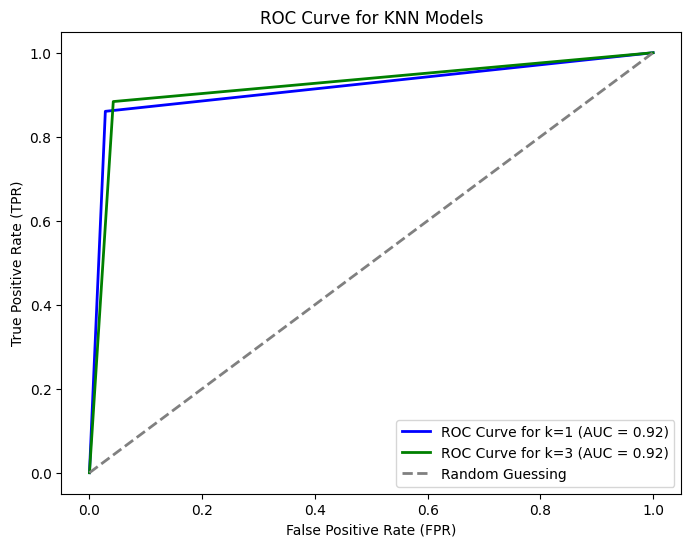

In [27]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# KNN with k = 1
knn_1 = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knn_1.fit(X_train, y_train)
predictions_1 = knn_1.predict(X_test)

# Calculate ROC curve
fpr_1, tpr_1, thresholds_1 = roc_curve(y_test, predictions_1)
roc_auc_1 = auc(fpr_1, tpr_1)

# KNN with k = 3
knn_3 = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_3.fit(X_train, y_train)
predictions_3 = knn_3.predict(X_test)

# Calculate ROC curve
fpr_3, tpr_3, thresholds_3 = roc_curve(y_test, predictions_3)
roc_auc_3 = auc(fpr_3, tpr_3)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_1, tpr_1, color='blue', lw=2, label=f'ROC Curve for k=1 (AUC = {roc_auc_1:.2f})')
plt.plot(fpr_3, tpr_3, color='green', lw=2, label=f'ROC Curve for k=3 (AUC = {roc_auc_3:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for KNN Models')
plt.legend()
plt.show()

# RandomForest

## base

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Split the dataset into features (X) and the target (y)
X = breast_cancer_data.drop(['diagnosis'], axis=1)
y = breast_cancer_data['diagnosis']

# Divide the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply a RandomForest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Evaluate the model's performance
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

# Generate classification report
classification_rep = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print(classification_rep)


Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



## threshold

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

correlation_threshold = 0.3 

# Compute the correlation matrix
corr_matrix = breast_cancer_data.corr()

# Filter out features with correlation less than the threshold
filtered_features = corr_matrix.index[abs(corr_matrix["diagnosis"]) > correlation_threshold].tolist()
filtered_features.remove('diagnosis')  # Ensure 'diagnosis' is not in the features

# Prepare the filtered dataset
X_filtered = breast_cancer_data[filtered_features]
y = breast_cancer_data['diagnosis']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.2, random_state=42)

# Train the RandomForest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy of the model:", accuracy)

# Generate a classification report which includes precision, recall, and f1-score
classification_rep = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print(classification_rep)


Accuracy of the model: 0.9649122807017544
              precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



## pca

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

# Assuming breast_cancer_data is your DataFrame
X = breast_cancer_data.drop(['diagnosis'], axis=1)
y = breast_cancer_data['diagnosis']

# Divide the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Apply a RandomForest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_pca, y_train)

# Evaluate the model's performance
y_pred = rf_classifier.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

# Generate classification report
classification_rep = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print(classification_rep)


Accuracy: 0.9824561403508771
              precision    recall  f1-score   support

           B       0.97      1.00      0.99        71
           M       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [46]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

# Assuming breast_cancer_data is your DataFrame
X = breast_cancer_data.drop(['diagnosis'], axis=1)
y = breast_cancer_data['diagnosis']

# Divide the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Define the parameter grid for RandomForest
param_grid = {
    'n_estimators': [100, 200, 300, 400], # Number of trees in random forest
    'max_depth': [4, 6, 8, 10], # Maximum number of levels in tree
    'min_samples_split': [2, 5, 7], # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 3] # Minimum number of samples required at each leaf node
}

# Create a RandomForest Classifier
rf = RandomForestClassifier(random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Use the best estimator to make predictions
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test_pca)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
classification_rep = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print(classification_rep)


Fitting 3 folds for each of 144 candidates, totalling 432 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy: 0.9824561403508771
              precision    recall  f1-score   support

           B       0.97      1.00      0.99        71
           M       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



## roc

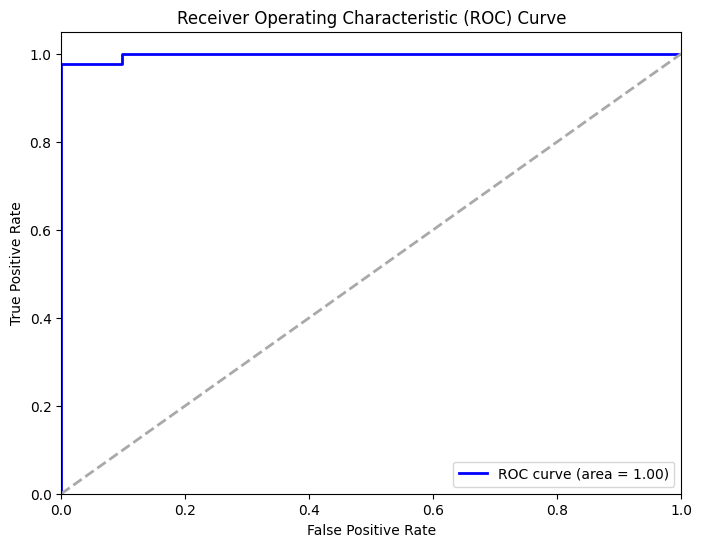

In [48]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities instead of classes
y_pred_proba = rf_classifier.predict_proba(X_test_pca)[:, 1]

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=rf_classifier.classes_[1])
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkgray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# XGBoost

## base

In [31]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Split the dataset into features (X) and the target (y)
X = breast_cancer_data.drop(['diagnosis'], axis=1)
y = breast_cancer_data['diagnosis']

# Divide the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply an XGBoost classifier
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_classifier.fit(X_train, y_train)

# Evaluate the model's performance
y_pred = xgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(accuracy)
# Generate a classification report which includes precision, recall, and f1-score
classification_rep = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print(classification_rep)

0.956140350877193
              precision    recall  f1-score   support

           B       0.96      0.97      0.97        71
           M       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



## corr

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

correlation_threshold = 0.4

# Compute the correlation matrix
corr_matrix = breast_cancer_data.corr()

# Filter out features with correlation less than the threshold
filtered_features = corr_matrix.index[abs(corr_matrix["diagnosis"]) > correlation_threshold].tolist()
filtered_features.remove('diagnosis')  # Ensure 'diagnosis' is not in the features

# Prepare the filtered dataset
X_filtered = breast_cancer_data[filtered_features]
y = breast_cancer_data['diagnosis']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.2, random_state=42)

# Train the XGBoost Classifier
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_classifier.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = xgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy of the model:", accuracy)
# Generate a classification report which includes precision, recall, and f1-score
classification_rep = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print(classification_rep)


Accuracy of the model: 0.9649122807017544
              precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



## pca

In [34]:
###### from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming breast_cancer_data is your DataFrame
X = breast_cancer_data.drop(['diagnosis'], axis=1)
y = breast_cancer_data['diagnosis']

# Divide the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=2)  # Adjust the number of components as needed
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Apply an XGBoost classifier
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_classifier.fit(X_train_pca, y_train)

# Evaluate the model's performance
y_pred = xgb_classifier.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

# Generate a classification report which includes precision, recall, and f1-score
classification_rep = classification_report(y_test, y_pred, target_names=label_encoder.inverse_transform(range(len(label_encoder.classes_))))
print(classification_rep)


0.9824561403508771
              precision    recall  f1-score   support

           B       0.99      0.99      0.99        71
           M       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



## hyperparameter tuning

In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming breast_cancer_data is your DataFrame
X = breast_cancer_data.drop(['diagnosis'], axis=1)
y = breast_cancer_data['diagnosis']

# Divide the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=2)  # Adjust the number of components as needed
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Apply an XGBoost classifier with hyperparameter tuning
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, scoring='accuracy', cv=3)
grid_search.fit(X_train_pca, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the model's performance with the best hyperparameters
best_xgb_classifier = grid_search.best_estimator_
y_pred = best_xgb_classifier.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy of the model:", accuracy)

# Generate a classification report which includes precision, recall, and f1-score
classification_rep = classification_report(y_test, y_pred, target_names=label_encoder.inverse_transform(range(len(label_encoder.classes_))))
print(classification_rep)


Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Accuracy of the model: 0.9824561403508771


TypeError: object of type 'numpy.int64' has no len()

## roc

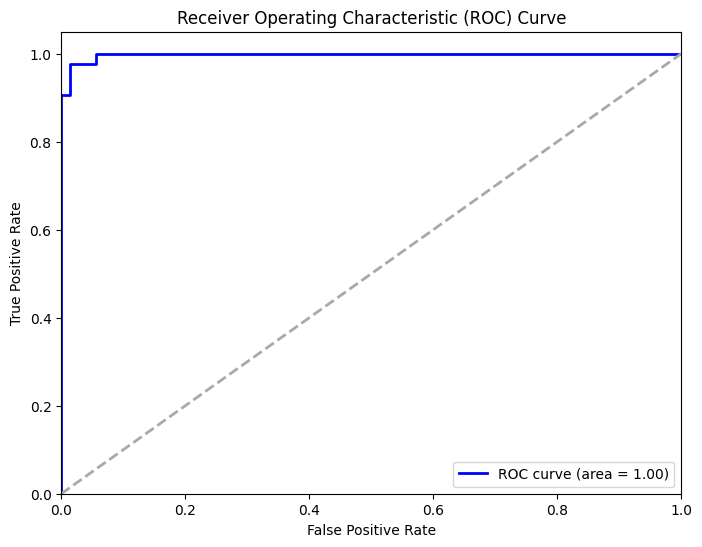

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the positive class
y_pred_proba = xgb_classifier.predict_proba(X_test_pca)[:, 1]

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=1)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkgray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
